In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from pprint import pprint
from sklearn.decomposition import PCA
import random
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
sns.set_context("talk")

# Data

In [49]:
#cdata = pd.read_csv('../features/oct_2018/features_larger_rock_jazz_01.csv').dropna()
cdata = pd.read_csv('../features/oct_2018/features_larger_classical_folk_01.csv').dropna()

# Test and Train Data

In [50]:
X_train, y_train = [], []
X_test, y_test = [], []

#data = cdata.sample(frac=1)

X = cdata[cdata.columns[0:-1]]
y = cdata[cdata.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, )

#for _ in range(0,100):
#X_train, X_test, y_train, y_test = train_test_split(X, y, )

# Random Forest

Accuracy: 0.819290896250642 (0.01669212874508883)


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


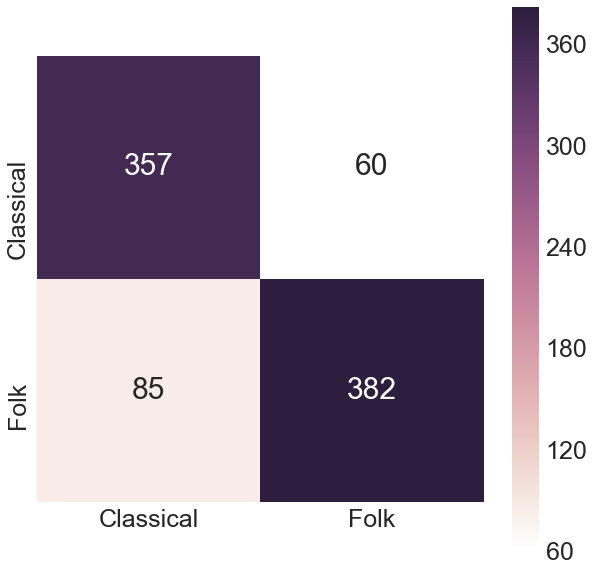

In [51]:
clf = RandomForestClassifier(max_depth=5, max_features=None, random_state=0)    
scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

#clabels = ['Rock', 'Jazz']
clabels = ['Classical', 'Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=clabels)
    
#sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True), fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
#plt.axes().set_aspect(1. / plt.axes().get_data_ratio())


sns.set(font_scale=2.5)
plt.figure(figsize = (10,10))
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True),fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())
plt.savefig('prediction_randomforest_classical_folk.pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('prediction_randomforest_rock_jazz.pdf', dpi=1000, bbox_inches='tight')

# AdaBoost

Accuracy: 0.8150520030816641 (0.016216099569460553)


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


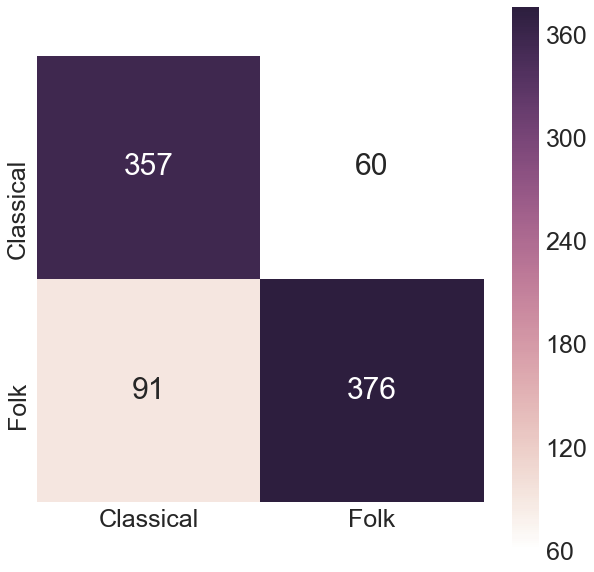

In [52]:
clf = AdaBoostClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

#clabels = ['Rock', 'Jazz']
clabels = ['Classical', 'Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=clabels)
    
#sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True), fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
#plt.axes().set_aspect(1. / plt.axes().get_data_ratio())

sns.set(font_scale=2.5)
plt.figure(figsize = (10,10))
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True),fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())
plt.savefig('prediction_adaboost_classical_folk.pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('prediction_adaboost_rock_jazz.pdf', dpi=1000, bbox_inches='tight')

# SVM

Accuracy: 0.7417693888032871 (0.024066867138830376)


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


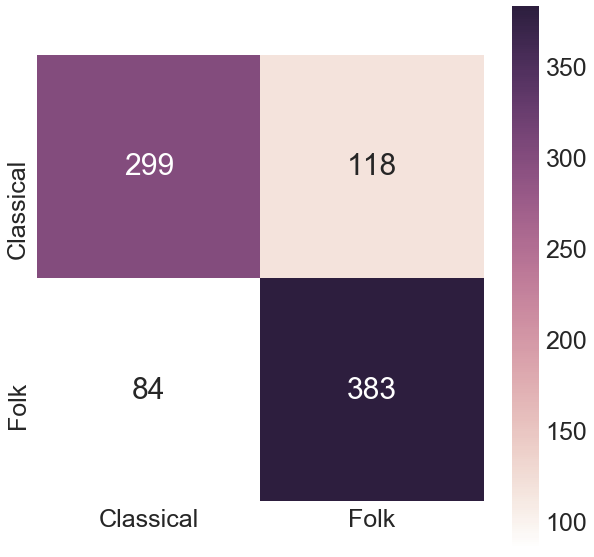

In [53]:
clf = svm.SVC(kernel='rbf', probability=False, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

#clabels = ['Rock', 'Jazz']
clabels = ['Classical', 'Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=clabels)
    
#sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True), fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
#plt.axes().set_aspect(1. / plt.axes().get_data_ratio())

sns.set(font_scale=2.5)
plt.figure(figsize = (10,10))
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True),fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())
plt.savefig('prediction_svm_classical_folk.pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('prediction_svm_rock_jazz.pdf', dpi=1000, bbox_inches='tight')

# Neural Network

Accuracy: 0.8195605418592706 (0.02346359043525108)


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


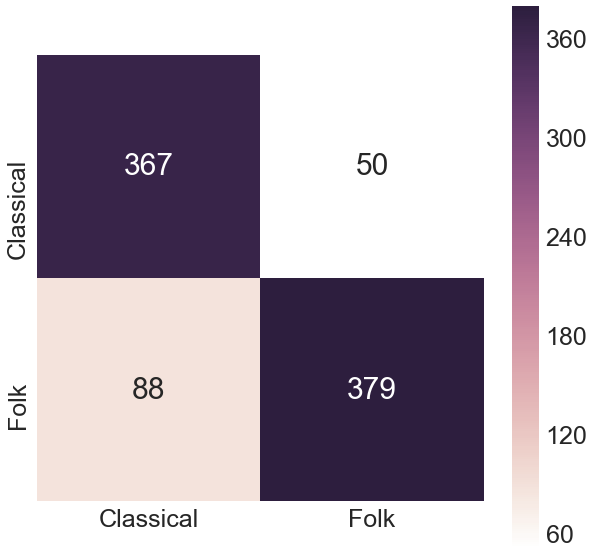

In [54]:
clf = clf = MLPClassifier(solver='lbfgs', activation='tanh', alpha=0.0001, hidden_layer_sizes=(5),\
                              learning_rate_init = 0.001, max_iter=2000, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

#clabels = ['Rock', 'Jazz']
clabels = ['Classical', 'Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=clabels)

sns.set(font_scale=2.5)
plt.figure(figsize = (10,10))
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True),fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())
plt.savefig('prediction_mlp_classical_folk.pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('prediction_mlp_rock_jazz.pdf', dpi=1000, bbox_inches='tight')

## Number of Components vs Variation

In [73]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [74]:
print(pca.explained_variance_ratio_ )

[6.16304031e-01 1.68865179e-01 1.26120558e-01 5.02436375e-02
 2.72514378e-02 6.18937290e-03 3.90672466e-03 6.47128600e-04
 4.26116848e-04 4.58131635e-05]


In [75]:
X_p = pca.transform(X)
X_p = np.transpose(X_p)
y_p = np.transpose(y)

#color = {'American Folk': 'red', 'Classical': 'green', 'Rock': 'blue', 'Jazz': 'yellow', 'Pop': 'purple'}
color = {'American Folk': 'red', 'Classical': 'green'}

y_color = [color[i] for i in y_p]

sns.regplot(x=X_p[0], y=X_p[1], fit_reg=False, scatter_kws={"color": y_color})

KeyError: 'Rock'

# Method 2

## Classical vs Folk

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


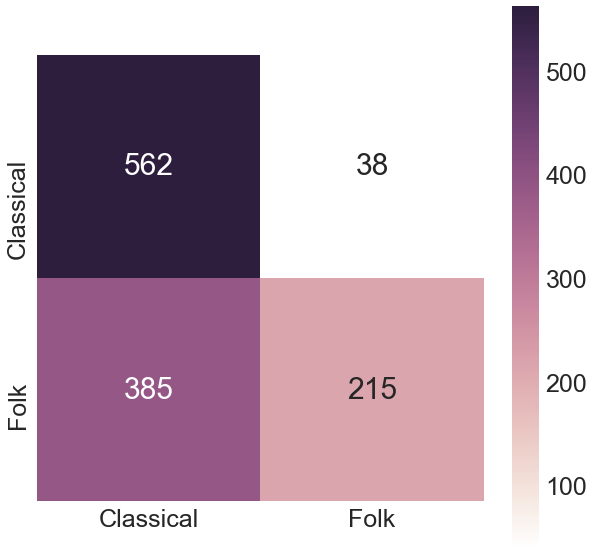

In [56]:
con = np.array([[562, 38], [385, 215]])

clabels = ['Classical', 'Folk']

sns.set(font_scale=2.5)
plt.figure(figsize = (10,10))
sns.heatmap(con, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True),fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())
plt.savefig('prediction_method2_classical_folk.pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('prediction_mlp_rock_jazz.pdf', dpi=1000, bbox_inches='tight')

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


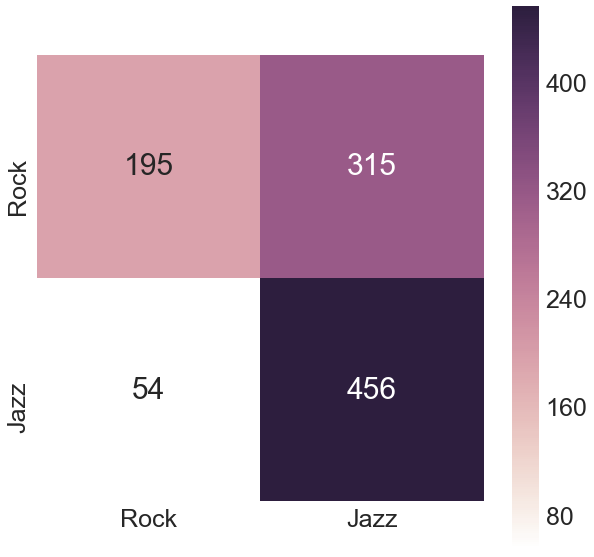

In [58]:
con = np.array([[195, 315], [54, 456]])

clabels = ['Rock', 'Jazz']

sns.set(font_scale=2.5)
plt.figure(figsize = (10,10))
sns.heatmap(con, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True),fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())
plt.savefig('prediction_method2_rock_jazz.pdf', dpi=1000, bbox_inches='tight')
